In [15]:
## Preloads
using Statistics
using FFTW
using Plots
using BenchmarkTools
using Profile
using LinearAlgebra
using Measures
using HDF5
using Plots
push!(LOAD_PATH, "/Users/saydjari/Dropbox/GradSchool_AKS/Doug/Projects/DHC/main/")
using DHC_2DUtils
using MLDatasets
using Images
using HDF5
theme(:juno)

In [16]:
# read the MNIST training data, x=image, y=class
train_x, train_y = CIFAR10.traindata();
test_x, test_y   = CIFAR10.testdata();

In [27]:
using Pkg
Pkg.add("ImageFiltering")
using ImageFiltering

  Resolving package versions...
Updating `~/.julia/environments/v1.5/Project.toml`
  [6a3955dd] + ImageFiltering v0.6.18
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [14]:
ImageShow(train_x[:,:,:,1])

LoadError: MethodError: objects of type Module are not callable

In [17]:
using Images
using TestImages
using ImageMetadata
using ImageAxes
using ImageDraw
using ImageView
using ImageTransformations
using ImageFiltering

┌ Info: Precompiling ImageIO [82e4d734-157c-48bb-816b-45c225c6df19]
└ @ Base loading.jl:1278
┌ Info: Precompiling PNGFiles [f57f5aa1-a3ce-4bc8-8ab9-96f992907883]
└ @ Base loading.jl:1278
┌ Info: Precompiling QuartzImageIO [dca85d43-d64c-5e67-8c65-017450d5d020]
└ @ Base loading.jl:1278


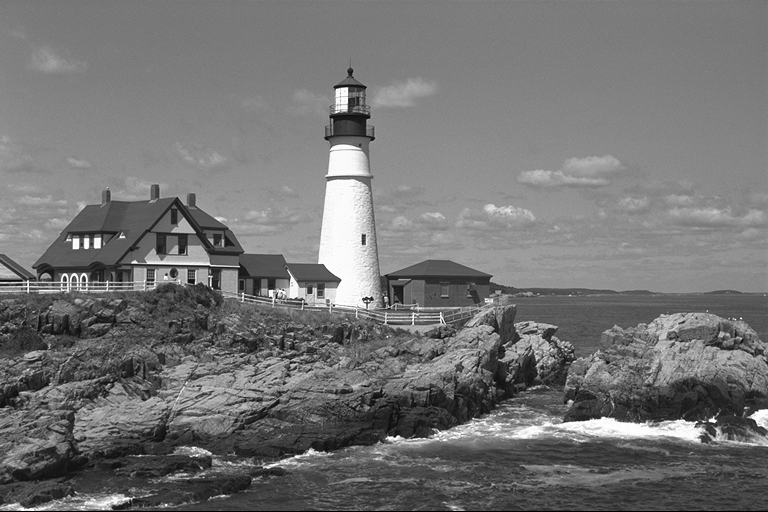

In [32]:
ImageFromTestImages = TestImages.testimage("lighthouse")
ImageFromTestImagesGray = Images.Gray.(ImageFromTestImages)

In [30]:
Pkg.add("ImageIO")
Pkg.add("QuartzImageIO")

  Resolving package versions...
  Installed ImageIO ── v0.4.1
  Installed Netpbm ─── v1.0.0
  Installed CEnum ──── v0.4.1
  Installed PNGFiles ─ v0.3.5
Updating `~/.julia/environments/v1.5/Project.toml`
  [82e4d734] + ImageIO v0.4.1
Updating `~/.julia/environments/v1.5/Manifest.toml`
  [fa961155] + CEnum v0.4.1
  [82e4d734] + ImageIO v0.4.1
  [f09324ee] + Netpbm v1.0.0
  [f57f5aa1] + PNGFiles v0.3.5
  Resolving package versions...
  Installed QuartzImageIO ─ v0.7.3
Updating `~/.julia/environments/v1.5/Project.toml`
  [dca85d43] + QuartzImageIO v0.7.3
Updating `~/.julia/environments/v1.5/Manifest.toml`
  [dca85d43] + QuartzImageIO v0.7.3


In [31]:
Pkg.add("ImageMagick")

  Resolving package versions...
  Installed ImageMagick_jll ─ v6.9.10-12+3
  Installed ImageMagick ───── v1.1.6
Updating `~/.julia/environments/v1.5/Project.toml`
  [6218d12a] + ImageMagick v1.1.6
Updating `~/.julia/environments/v1.5/Manifest.toml`
  [6218d12a] + ImageMagick v1.1.6
  [c73af94c] + ImageMagick_jll v6.9.10-12+3


In [18]:
using ImageCore, TestImages, Colors

In [36]:
using Pkg
Pkg.add("Colors")
using Colors

  Resolving package versions...
Updating `~/.julia/environments/v1.5/Project.toml`
  [5ae59095] + Colors v0.12.6
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [38]:
size(train_x)

(32, 32, 3, 50000)

In [19]:
import Images

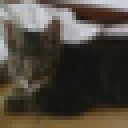

In [24]:
ind = 10
s = StackedView(transpose(train_x[:,:,1,ind]),transpose(train_x[:,:,2,ind]),transpose(train_x[:,:,3,ind]));
sc = colorview(RGB, s)

In [27]:
save("../images/CIFAR10_ex_color.png",sc)

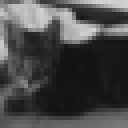

In [28]:
temp = Images.Gray.(sc)

In [30]:
save("../images/CIFAR10_ex_grey.png",temp)

0

In [20]:
using DSP

In [21]:
using Interpolations

In [33]:
function wind_2d(nx)
    dx   = nx/2-1
    filter = zeros(Float64, nx, nx)
    A = DSP.tukey(nx, 0.3)
    itp = extrapolate(interpolate(A,BSpline(Linear())),0)
    @inbounds for x = 1:nx
        sx = x-dx-1    # define sx,sy so that no fftshift() needed
        for y = 1:nx
            sy = y-dx-1
            r  = sqrt.((sx).^2 + (sy).^2) + 128
            filter[x,y] = itp(r)
        end
    end
    return filter
end

wind_2d (generic function with 1 method)

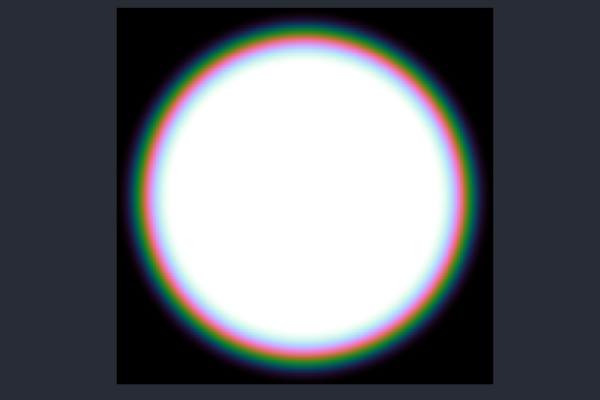

In [34]:
Plots.plot(Plots.heatmap(wind_2d(256),
    xlims=(1,256),
    ylims=(1,256),
    aspectratio=1,
    axis=nothing,
    border=:none,
    c=:cubehelix,
    legend = :none,
    margin=0mm))

In [35]:
function mnist_pad(im; θ=0.0)
    impad = zeros(Float64,64,64)
    impad[48:-1:17,17:48] = im
    imbig = imresize(impad,(128,128))
    if θ != 0.0
        imrot = imrotate(imbig, θ, axes(imbig), Cubic(Throw(OnGrid())))
        imrot[findall(imrot .!= imrot)] .= 0.0
        return imrot
    end
    return imbig
end

mnist_pad (generic function with 1 method)

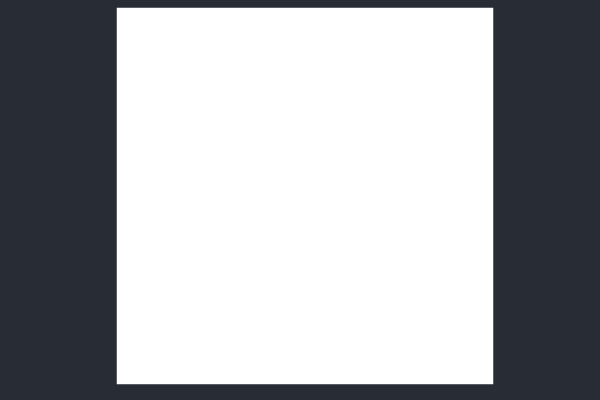

In [40]:
Plots.plot(Plots.heatmap(mnist_pad(test_img, θ=0),
    xlims=(1,128),
    ylims=(1,128),
    aspectratio=1,
    axis=nothing,
    border=:none,
    c=:greys,
    legend = :none,
    margin=0mm))

In [39]:
test_img = convert(Array{Float64}, temp)

32×32 Array{Float64,2}:
 0.486275  0.403922  0.364706  0.388235  …  0.807843   0.8        0.811765
 0.564706  0.564706  0.678431  0.74902      0.784314   0.796078   0.819608
 0.717647  0.568627  0.615686  0.72549      0.45098    0.517647   0.592157
 0.772549  0.709804  0.596078  0.654902     0.184314   0.192157   0.219608
 0.6       0.670588  0.615686  0.580392     0.152941   0.14902    0.145098
 0.533333  0.415686  0.411765  0.529412  …  0.156863   0.180392   0.219608
 0.592157  0.380392  0.298039  0.392157     0.505882   0.541176   0.611765
 0.603922  0.443137  0.258824  0.360784     0.705882   0.698039   0.729412
 0.584314  0.47451   0.27451   0.341176     0.494118   0.509804   0.494118
 0.658824  0.454902  0.286275  0.305882     0.180392   0.192157   0.176471
 0.776471  0.466667  0.223529  0.203922  …  0.0784314  0.0745098  0.0823529
 0.796078  0.576471  0.239216  0.211765     0.0980392  0.0941176  0.0941176
 0.752941  0.682353  0.298039  0.211765     0.0901961  0.0862745  0.090196

In [68]:
test_img .- mean(test_img)

32×32 Array{Float64,2}:
  0.202152    0.119799    0.0805836   …   0.523721    0.515878    0.527642
  0.280584    0.280584    0.394309        0.500191    0.511956    0.535486
  0.433525    0.284505    0.331564        0.166858    0.233525    0.308035
  0.488427    0.425682    0.311956       -0.0998085  -0.0919654  -0.0645144
  0.315878    0.386466    0.331564       -0.131181   -0.135103   -0.139024
  0.249211    0.131564    0.127642    …  -0.127259   -0.10373    -0.0645144
  0.308035    0.0962699   0.013917        0.22176     0.257054    0.327642
  0.319799    0.159015   -0.0252987       0.42176     0.413917    0.44529
  0.300191    0.190388   -0.00961244      0.209995    0.225682    0.209995
  0.374701    0.17078     0.00215227     -0.10373    -0.0919654  -0.107652
  0.492348    0.182544   -0.0605928   …  -0.205691   -0.209612   -0.201769
  0.511956    0.292348   -0.0449066      -0.186083   -0.190005   -0.190005
  0.468819    0.398231    0.013917       -0.193926   -0.197848   -0.193926


In [38]:
function mnist_pad(im; θ=0.0)
    imbig = imresize(im,(64,64))
    mu_imbig = mean(imbig)
    imbig .-= mu_imbig
    imbig .*= wind_2d(64)
    impad = zeros(Float64,128,128)
    impad[96:-1:33,33:96] = imbig
    
    if θ != 0.0
        imrot = imrotate(impad, θ, axes(impad), Cubic(Throw(OnGrid())))
        imrot[findall(imrot .!= imrot)] .= 0.0
        return imrot .+ mu_imbig
    end
    
    return impad.+ mu_imbig
end

mnist_pad (generic function with 1 method)

In [45]:
Plots.plot(Plots.heatmap(mnist_pad(test_img, θ=0),
    xlims=(1,128),
    ylims=(1,128),
    aspectratio=1,
    axis=nothing,
    border=:none,
    c=:greys,
    #yflip=true,
    legend = :none,
    margin=0mm))
savefig("../images/CIFAR10_padapod.png")

In [44]:
Plots.plot(Plots.heatmap(mnist_pad(test_img, θ=1.2),
    xlims=(1,128),
    ylims=(1,128),
    aspectratio=1,
    axis=nothing,
    border=:none,
    c=:greys,
    #yflip=true,
    legend = :none,
    margin=0mm))
savefig("../images/CIFAR10_rot.png")

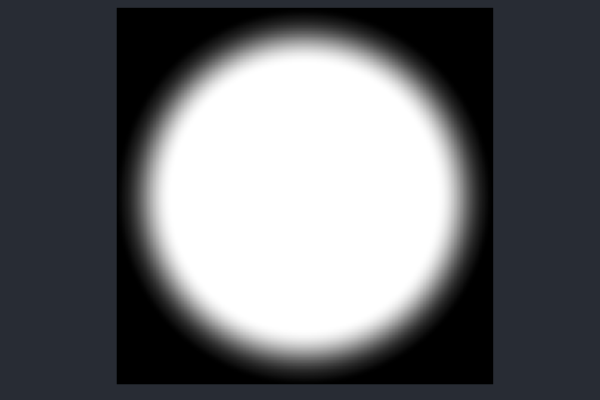

In [81]:
Plots.plot(Plots.heatmap(wind_2d(256),
    xlims=(1,256),
    ylims=(1,256),
    aspectratio=1,
    axis=nothing,
    border=:none,
    c=:greys,
    legend = :none,
    margin=0mm))

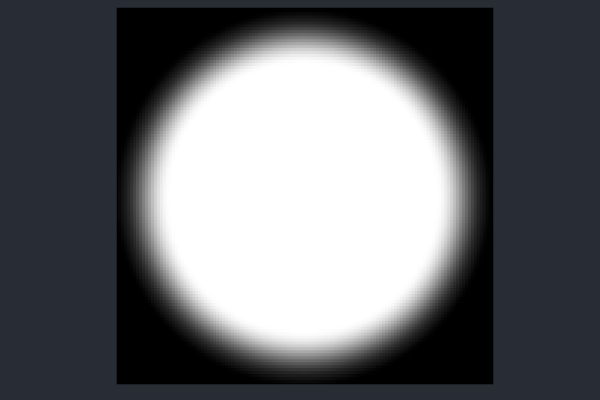

In [85]:
Plots.plot(Plots.heatmap(wind_2d(128),
    xlims=(1,128),
    ylims=(1,128),
    aspectratio=1,
    axis=nothing,
    border=:none,
    c=:greys,
    legend = :none,
    margin=0mm))

In [41]:
function wind_2d(nx)
    dx   = nx/2-1
    filter = zeros(Float64, nx, nx)
    A = DSP.tukey(nx, 0.3)
    itp = extrapolate(interpolate(A,BSpline(Linear())),0)
    @inbounds for x = 1:nx
        sx = x-dx-1    # define sx,sy so that no fftshift() needed
        for y = 1:nx
            sy = y-dx-1
            r  = sqrt.((sx).^2 + (sy).^2) + nx/2
            filter[x,y] = itp(r)
        end
    end
    return filter
end

wind_2d (generic function with 1 method)

In [12]:
lst_train = Array{Any}(undef, 0)
for i = 1:size(train_x)[4]
    s = StackedView(transpose(train_x[:,:,1,i]),transpose(train_x[:,:,2,i]),transpose(train_x[:,:,3,i]));
    temp = Images.Gray.(colorview(RGB, s))
    timg = convert(Array{Float64}, temp)
    push!(lst_train,timg)
end

lst_test = Array{Any}(undef, 0)
for i = 1:size(test_x)[4]
    s = StackedView(transpose(test_x[:,:,1,i]),transpose(test_x[:,:,2,i]),transpose(test_x[:,:,3,i]));
    temp = Images.Gray.(colorview(RGB, s))
    timg = convert(Array{Float64}, temp)
    push!(lst_test,timg)
end

In [48]:
size(lst_train)

(50000,)

In [22]:
using Distributed
using ProgressMeter

In [23]:
workers()

7-element Array{Int64,1}:
 2
 3
 4
 5
 6
 7
 8

In [112]:
@everywhere begin
    using Statistics
    using LinearAlgebra
    using Distributed
    push!(LOAD_PATH, "/Users/saydjari/Dropbox/GradSchool_AKS/Doug/Projects/DHC/main/")
    using DHC_2DUtils
    using FFTW
    using Images
    using Interpolations
    using DSP
    using ProgressMeter
    
    # filter bank
    filter_hash = fink_filter_hash(1,8,nx=128,wd=2)
    
    function wind_2d(nx)
        dx   = nx/2-1
        filter = zeros(Float64, nx, nx)
        A = DSP.tukey(nx, 0.3)
        itp = extrapolate(interpolate(A,BSpline(Linear())),0)
        @inbounds for x = 1:nx
            sx = x-dx-1    # define sx,sy so that no fftshift() needed
            for y = 1:nx
                sy = y-dx-1
                r  = sqrt.((sx).^2 + (sy).^2) + nx/2
                filter[x,y] = itp(r)
            end
        end
        return filter
    end
    
    function mnist_pad(im; θ=0.0)
        imbig = imresize(im,(64,64))
        mu_imbig = mean(imbig)
        imbig .-= mu_imbig
        imbig .*= wind_2d(64)
        impad = zeros(Float64,128,128)
        impad[96:-1:33,33:96] = imbig

        if θ != 0.0
            imrot = imrotate(impad, θ, axes(impad), Cubic(Throw(OnGrid())))
            imrot[findall(imrot .!= imrot)] .= 0.0
            return imrot .+ mu_imbig
        end

        return impad.+ mu_imbig
    end
    
    function mnist_DHC(x)
        image    = mnist_pad(x[:,:], θ=0.0)
        WST = DHC_compute(image, filter_hash,filter_hash)
        return WST
    end
end
 
mnist_DHC_out = @showprogress pmap(mnist_DHC, lst_train)
mnist_DHC_out = hcat(mnist_DHC_out...)

h5write("../scratch_AKS/cifar10_train.h5", "main/data", mnist_DHC_out)

Progress: 100%|█████████████████████████████████████████| Time: 0:12:29m:30


In [113]:
@everywhere begin
    using Statistics
    using LinearAlgebra
    using Distributed
    push!(LOAD_PATH, "/Users/saydjari/Dropbox/GradSchool_AKS/Doug/Projects/DHC/main/")
    using DHC_2DUtils
    using FFTW
    using Images
    using Interpolations
    using DSP
    using ProgressMeter
    
    # filter bank
    filter_hash = fink_filter_hash(1,8,nx=128,wd=2)
    
    function wind_2d(nx)
        dx   = nx/2-1
        filter = zeros(Float64, nx, nx)
        A = DSP.tukey(nx, 0.3)
        itp = extrapolate(interpolate(A,BSpline(Linear())),0)
        @inbounds for x = 1:nx
            sx = x-dx-1    # define sx,sy so that no fftshift() needed
            for y = 1:nx
                sy = y-dx-1
                r  = sqrt.((sx).^2 + (sy).^2) + nx/2
                filter[x,y] = itp(r)
            end
        end
        return filter
    end
    
    function mnist_pad(im; θ=0.0)
        imbig = imresize(im,(64,64))
        mu_imbig = mean(imbig)
        imbig .-= mu_imbig
        imbig .*= wind_2d(64)
        impad = zeros(Float64,128,128)
        impad[96:-1:33,33:96] = imbig

        if θ != 0.0
            imrot = imrotate(impad, θ, axes(impad), Cubic(Throw(OnGrid())))
            imrot[findall(imrot .!= imrot)] .= 0.0
            return imrot .+ mu_imbig
        end

        return impad.+ mu_imbig
    end
    
    function mnist_DHC(x)
        image    = mnist_pad(x[:,:], θ=0.0)
        WST = DHC_compute(image, filter_hash,filter_hash)
        return WST
    end
end
 
mnist_DHC_out = @showprogress pmap(mnist_DHC, lst_test)
mnist_DHC_out = hcat(mnist_DHC_out...)

h5write("../scratch_AKS/cifar10_test.h5", "main/data", mnist_DHC_out)

Progress: 100%|█████████████████████████████████████████| Time: 0:02:30


In [24]:
M = 100
angle_array = []
for i = 2π/M:2π/M:2π
    append!(angle_array,i)
end

M = 100
train_angles = [2π/M,π/3,2π/3,3π/3,4π/3,5π/3];

In [ ]:
@everywhere begin
    using Statistics
    using LinearAlgebra
    using Distributed
    push!(LOAD_PATH, "/Users/saydjari/Dropbox/GradSchool_AKS/Doug/Projects/DHC/main/")
    using DHC_2DUtils
    using FFTW
    using Images
    using Interpolations
    using DSP
    using ProgressMeter
    
    # filter bank
    filter_hash = fink_filter_hash(1,8,nx=128,wd=2)
    
    function wind_2d(nx)
        dx   = nx/2-1
        filter = zeros(Float64, nx, nx)
        A = DSP.tukey(nx, 0.3)
        itp = extrapolate(interpolate(A,BSpline(Linear())),0)
        @inbounds for x = 1:nx
            sx = x-dx-1    # define sx,sy so that no fftshift() needed
            for y = 1:nx
                sy = y-dx-1
                r  = sqrt.((sx).^2 + (sy).^2) + nx/2
                filter[x,y] = itp(r)
            end
        end
        return filter
    end
    
    function mnist_pad(im; θ=0.0)
        imbig = imresize(im,(64,64))
        mu_imbig = mean(imbig)
        imbig .-= mu_imbig
        imbig .*= wind_2d(64)
        impad = zeros(Float64,128,128)
        impad[96:-1:33,33:96] = imbig

        if θ != 0.0
            imrot = imrotate(impad, θ, axes(impad), Cubic(Throw(OnGrid())))
            imrot[findall(imrot .!= imrot)] .= 0.0
            return imrot .+ mu_imbig
        end

        return impad.+ mu_imbig
    end
    
    function mnist_DHC(params)
        θ, x = params
        image    = mnist_pad(x[:,:], θ=θ)
        WST = DHC_compute(image, filter_hash,filter_hash)
        return WST
    end
end
 
mnist_DHC_out = @showprogress pmap(mnist_DHC, Iterators.product(angle_array,lst_test))
mnist_DHC_out = hcat(mnist_DHC_out...)

h5write("../scratch_AKS/cifar10_test_angles.h5", "main/data", mnist_DHC_out)

Progress:  64%|██████████████████████████               |  ETA: 5:08:00m03m

In [117]:
@everywhere begin
    using Statistics
    using LinearAlgebra
    using Distributed
    push!(LOAD_PATH, "/Users/saydjari/Dropbox/GradSchool_AKS/Doug/Projects/DHC/main/")
    using DHC_2DUtils
    using FFTW
    using Images
    using Interpolations
    using DSP
    using ProgressMeter
    
    # filter bank
    filter_hash = fink_filter_hash(1,8,nx=128,wd=2)
    
    function wind_2d(nx)
        dx   = nx/2-1
        filter = zeros(Float64, nx, nx)
        A = DSP.tukey(nx, 0.3)
        itp = extrapolate(interpolate(A,BSpline(Linear())),0)
        @inbounds for x = 1:nx
            sx = x-dx-1    # define sx,sy so that no fftshift() needed
            for y = 1:nx
                sy = y-dx-1
                r  = sqrt.((sx).^2 + (sy).^2) + nx/2
                filter[x,y] = itp(r)
            end
        end
        return filter
    end
    
    function mnist_pad(im; θ=0.0)
        imbig = imresize(im,(64,64))
        mu_imbig = mean(imbig)
        imbig .-= mu_imbig
        imbig .*= wind_2d(64)
        impad = zeros(Float64,128,128)
        impad[96:-1:33,33:96] = imbig

        if θ != 0.0
            imrot = imrotate(impad, θ, axes(impad), Cubic(Throw(OnGrid())))
            imrot[findall(imrot .!= imrot)] .= 0.0
            return imrot .+ mu_imbig
        end

        return impad.+ mu_imbig
    end
    
    function mnist_DHC(params)
        θ, x = params
        image    = mnist_pad(x[:,:], θ=θ)
        WST = DHC_compute(image, filter_hash,filter_hash)
        return WST
    end
end
 
mnist_DHC_out = @showprogress pmap(mnist_DHC, Iterators.product(train_angles,lst_train))
mnist_DHC_out = hcat(mnist_DHC_out...)

h5write("../scratch_AKS/cifar10_train_angles.h5", "main/data", mnist_DHC_out)

Progress: 100%|█████████████████████████████████████████| Time: 1:26:42m:20


In [ ]:
# read the MNIST training data, x=image, y=class
train_x, train_y = CIFAR100.traindata();
test_x, test_y   = CIFAR100.testdata();

lst_train = Array{Any}(undef, 0)
for i = 1:size(train_x)[4]
    s = StackedView(transpose(train_x[:,:,1,i]),transpose(train_x[:,:,2,i]),transpose(train_x[:,:,3,i]));
    temp = Images.Gray.(colorview(RGB, s))
    timg = convert(Array{Float64}, temp)
    push!(lst_train,timg)
end

lst_test = Array{Any}(undef, 0)
for i = 1:size(test_x)[4]
    s = StackedView(transpose(test_x[:,:,1,i]),transpose(test_x[:,:,2,i]),transpose(test_x[:,:,3,i]));
    temp = Images.Gray.(colorview(RGB, s))
    timg = convert(Array{Float64}, temp)
    push!(lst_test,timg)
end

In [53]:
@everywhere begin
    using Statistics
    using LinearAlgebra
    using Distributed
    push!(LOAD_PATH, "/Users/saydjari/Dropbox/GradSchool_AKS/Doug/Projects/DHC/main/")
    using DHC_2DUtils
    using FFTW
    using Images
    using Interpolations
    using DSP
    using ProgressMeter
    
    # filter bank
    filter_hash = fink_filter_hash(1,8,nx=128,wd=2)
    
    function wind_2d(nx)
        dx   = nx/2-1
        filter = zeros(Float64, nx, nx)
        A = DSP.tukey(nx, 0.3)
        itp = extrapolate(interpolate(A,BSpline(Linear())),0)
        @inbounds for x = 1:nx
            sx = x-dx-1    # define sx,sy so that no fftshift() needed
            for y = 1:nx
                sy = y-dx-1
                r  = sqrt.((sx).^2 + (sy).^2) + nx/2
                filter[x,y] = itp(r)
            end
        end
        return filter
    end
    
    function mnist_pad(im; θ=0.0)
        imbig = imresize(im,(64,64))
        mu_imbig = mean(imbig)
        imbig .-= mu_imbig
        imbig .*= wind_2d(64)
        impad = zeros(Float64,128,128)
        impad[96:-1:33,33:96] = imbig

        if θ != 0.0
            imrot = imrotate(impad, θ, axes(impad), Cubic(Throw(OnGrid())))
            imrot[findall(imrot .!= imrot)] .= 0.0
            return imrot .+ mu_imbig
        end

        return impad.+ mu_imbig
    end
    
    function mnist_DHC(x)
        image    = mnist_pad(x[:,:], θ=0.0)
        WST = DHC_compute(image, filter_hash,filter_hash)
        return WST
    end
end
 
mnist_DHC_out = @showprogress pmap(mnist_DHC, lst_train)
mnist_DHC_out = hcat(mnist_DHC_out...)

h5write("../scratch_AKS/cifar100_train.h5", "main/data", mnist_DHC_out)

Progress: 100%|█████████████████████████████████████████| Time: 0:12:5439m


In [54]:
@everywhere begin
    using Statistics
    using LinearAlgebra
    using Distributed
    push!(LOAD_PATH, "/Users/saydjari/Dropbox/GradSchool_AKS/Doug/Projects/DHC/main/")
    using DHC_2DUtils
    using FFTW
    using Images
    using Interpolations
    using DSP
    using ProgressMeter
    
    # filter bank
    filter_hash = fink_filter_hash(1,8,nx=128,wd=2)
    
    function wind_2d(nx)
        dx   = nx/2-1
        filter = zeros(Float64, nx, nx)
        A = DSP.tukey(nx, 0.3)
        itp = extrapolate(interpolate(A,BSpline(Linear())),0)
        @inbounds for x = 1:nx
            sx = x-dx-1    # define sx,sy so that no fftshift() needed
            for y = 1:nx
                sy = y-dx-1
                r  = sqrt.((sx).^2 + (sy).^2) + nx/2
                filter[x,y] = itp(r)
            end
        end
        return filter
    end
    
    function mnist_pad(im; θ=0.0)
        imbig = imresize(im,(64,64))
        mu_imbig = mean(imbig)
        imbig .-= mu_imbig
        imbig .*= wind_2d(64)
        impad = zeros(Float64,128,128)
        impad[96:-1:33,33:96] = imbig

        if θ != 0.0
            imrot = imrotate(impad, θ, axes(impad), Cubic(Throw(OnGrid())))
            imrot[findall(imrot .!= imrot)] .= 0.0
            return imrot .+ mu_imbig
        end

        return impad.+ mu_imbig
    end
    
    function mnist_DHC(x)
        image    = mnist_pad(x[:,:], θ=0.0)
        WST = DHC_compute(image, filter_hash,filter_hash)
        return WST
    end
end
 
mnist_DHC_out = @showprogress pmap(mnist_DHC, lst_test)
mnist_DHC_out = hcat(mnist_DHC_out...)

h5write("../scratch_AKS/cifar100_test.h5", "main/data", mnist_DHC_out)

Progress: 100%|█████████████████████████████████████████| Time: 0:02:29


In [55]:
@everywhere begin
    using Statistics
    using LinearAlgebra
    using Distributed
    push!(LOAD_PATH, "/Users/saydjari/Dropbox/GradSchool_AKS/Doug/Projects/DHC/main/")
    using DHC_2DUtils
    using FFTW
    using Images
    using Interpolations
    using DSP
    using ProgressMeter
    
    # filter bank
    filter_hash = fink_filter_hash(1,8,nx=128,wd=2)
    
    function wind_2d(nx)
        dx   = nx/2-1
        filter = zeros(Float64, nx, nx)
        A = DSP.tukey(nx, 0.3)
        itp = extrapolate(interpolate(A,BSpline(Linear())),0)
        @inbounds for x = 1:nx
            sx = x-dx-1    # define sx,sy so that no fftshift() needed
            for y = 1:nx
                sy = y-dx-1
                r  = sqrt.((sx).^2 + (sy).^2) + nx/2
                filter[x,y] = itp(r)
            end
        end
        return filter
    end
    
    function mnist_pad(im; θ=0.0)
        imbig = imresize(im,(64,64))
        mu_imbig = mean(imbig)
        imbig .-= mu_imbig
        imbig .*= wind_2d(64)
        impad = zeros(Float64,128,128)
        impad[96:-1:33,33:96] = imbig

        if θ != 0.0
            imrot = imrotate(impad, θ, axes(impad), Cubic(Throw(OnGrid())))
            imrot[findall(imrot .!= imrot)] .= 0.0
            return imrot .+ mu_imbig
        end

        return impad.+ mu_imbig
    end
    
    function mnist_DHC(params)
        θ, x = params
        image    = mnist_pad(x[:,:], θ=θ)
        WST = DHC_compute(image, filter_hash,filter_hash)
        return WST
    end
end
 
mnist_DHC_out = @showprogress pmap(mnist_DHC, Iterators.product(train_angles,lst_train))
mnist_DHC_out = hcat(mnist_DHC_out...)

h5write("../scratch_AKS/cifar100_train_angles.h5", "main/data", mnist_DHC_out)

Progress: 100%|█████████████████████████████████████████| Time: 1:25:22m02m


In [ ]:
@everywhere begin
    using Statistics
    using LinearAlgebra
    using Distributed
    push!(LOAD_PATH, "/Users/saydjari/Dropbox/GradSchool_AKS/Doug/Projects/DHC/main/")
    using DHC_2DUtils
    using FFTW
    using Images
    using Interpolations
    using DSP
    using ProgressMeter
    
    # filter bank
    filter_hash = fink_filter_hash(1,8,nx=128,wd=2)
    
    function wind_2d(nx)
        dx   = nx/2-1
        filter = zeros(Float64, nx, nx)
        A = DSP.tukey(nx, 0.3)
        itp = extrapolate(interpolate(A,BSpline(Linear())),0)
        @inbounds for x = 1:nx
            sx = x-dx-1    # define sx,sy so that no fftshift() needed
            for y = 1:nx
                sy = y-dx-1
                r  = sqrt.((sx).^2 + (sy).^2) + nx/2
                filter[x,y] = itp(r)
            end
        end
        return filter
    end
    
    function mnist_pad(im; θ=0.0)
        imbig = imresize(im,(64,64))
        mu_imbig = mean(imbig)
        imbig .-= mu_imbig
        imbig .*= wind_2d(64)
        impad = zeros(Float64,128,128)
        impad[96:-1:33,33:96] = imbig

        if θ != 0.0
            imrot = imrotate(impad, θ, axes(impad), Cubic(Throw(OnGrid())))
            imrot[findall(imrot .!= imrot)] .= 0.0
            return imrot .+ mu_imbig
        end

        return impad.+ mu_imbig
    end
    
    function mnist_DHC(params)
        θ, x = params
        image    = mnist_pad(x[:,:], θ=θ)
        WST = DHC_compute(image, filter_hash,filter_hash)
        return WST
    end
end
 
mnist_DHC_out = @showprogress pmap(mnist_DHC, Iterators.product(angle_array,lst_test))
mnist_DHC_out = hcat(mnist_DHC_out...)

h5write("../scratch_AKS/cifar100_test_angles.h5", "main/data", mnist_DHC_out)